C:\Users\viral\AppData\Local\Temp\ipykernel_852\389985635.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job_class', y='default', data=df, order=['Unemployed', 'Unskilled', 'Skilled', 'Management'], palette="viridis")


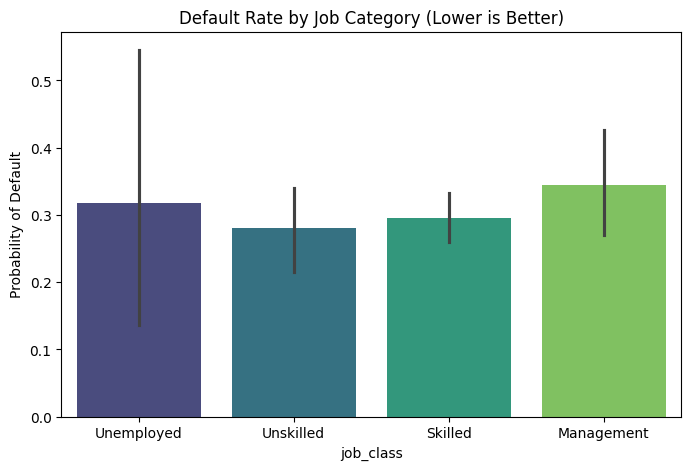

job_class
Management    0.344595
Skilled       0.295238
Unemployed    0.318182
Unskilled     0.280000
Name: default, dtype: float64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = ["checking_status", "duration", "credit_history", "purpose", "credit_amount", 
           "savings_status", "employment_years", "installment_rate", "personal_status", 
           "guarantors", "residence_years", "property", "age", "installment_plans", 
           "housing", "existing_credits", "job", "dependents", "telephone", "foreign_worker", "target"]

df = pd.read_csv(url, sep=' ', header=None, names=columns)

# 2. Decode "Job" for readability
# A171: Unemployed/Unskilled(Non-resident), A172: Unskilled(Resident), A173: Skilled, A174: Mgmt
job_map = {'A171': 'Unemployed', 'A172': 'Unskilled', 'A173': 'Skilled', 'A174': 'Management'}
df['job_class'] = df['job'].map(job_map)

# 3. Convert Target (1=Good, 2=Bad) to (0=Good, 1=Bad) for calculation
df['default'] = df['target'].apply(lambda x: 1 if x == 2 else 0)

# 4. The "Survivor Bias" Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='job_class', y='default', data=df, order=['Unemployed', 'Unskilled', 'Skilled', 'Management'], palette="viridis")
plt.title("Default Rate by Job Category (Lower is Better)")
plt.ylabel("Probability of Default")
plt.show()

# 5. Print the raw numbers
print(df.groupby('job_class')['default'].mean())

C:\Users\viral\AppData\Local\Temp\ipykernel_852\537435052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job_class', data=df, order=['Unemployed', 'Unskilled', 'Skilled', 'Management'], palette="viridis")


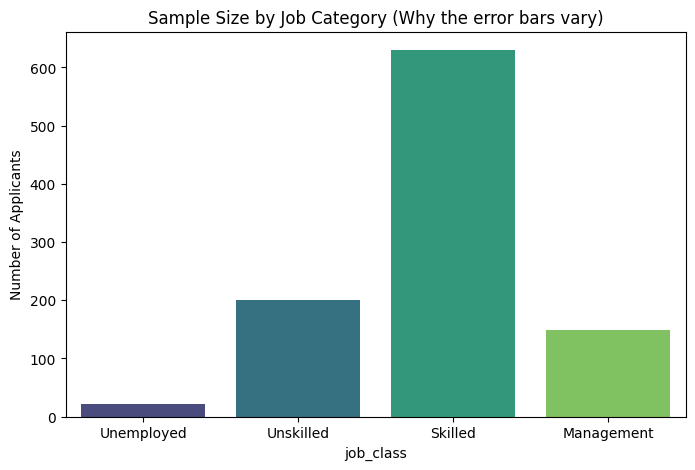

In [3]:
# Add this to analysis.ipynb

plt.figure(figsize=(8, 5))
# This counts the number of rows for each job type
sns.countplot(x='job_class', data=df, order=['Unemployed', 'Unskilled', 'Skilled', 'Management'], palette="viridis")
plt.title("Sample Size by Job Category (Why the error bars vary)")
plt.ylabel("Number of Applicants")
plt.show()

C:\Users\viral\AppData\Local\Temp\ipykernel_852\197393418.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='default', data=df, palette="magma")


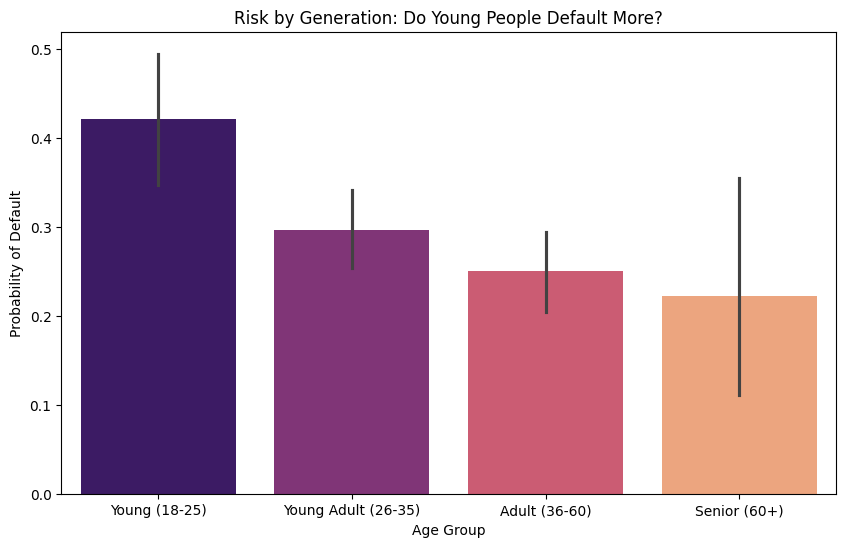

age_group
Young (18-25)          0.421053
Young Adult (26-35)    0.296482
Adult (36-60)          0.250681
Senior (60+)           0.222222
Name: default, dtype: float64


C:\Users\viral\AppData\Local\Temp\ipykernel_852\197393418.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age_group')['default'].mean())


In [4]:
# --- ADD THIS TO NEW CELL ---

# 1. Create Age Bins (Generations)
# We slice the continuous 'age' variable into logical groups
df['age_group'] = pd.cut(df['age'], 
                         bins=[18, 25, 35, 60, 120], 
                         labels=['Young (18-25)', 'Young Adult (26-35)', 'Adult (36-60)', 'Senior (60+)'])

# 2. Visualize the Risk Curve
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='default', data=df, palette="magma")
plt.title("Risk by Generation: Do Young People Default More?")
plt.ylabel("Probability of Default")
plt.xlabel("Age Group")
plt.show()

# 3. Print the exact numbers
print(df.groupby('age_group')['default'].mean())

C:\Users\viral\AppData\Local\Temp\ipykernel_852\1453702382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='default', y='purpose', data=df, order=order, palette="coolwarm", orient='h')


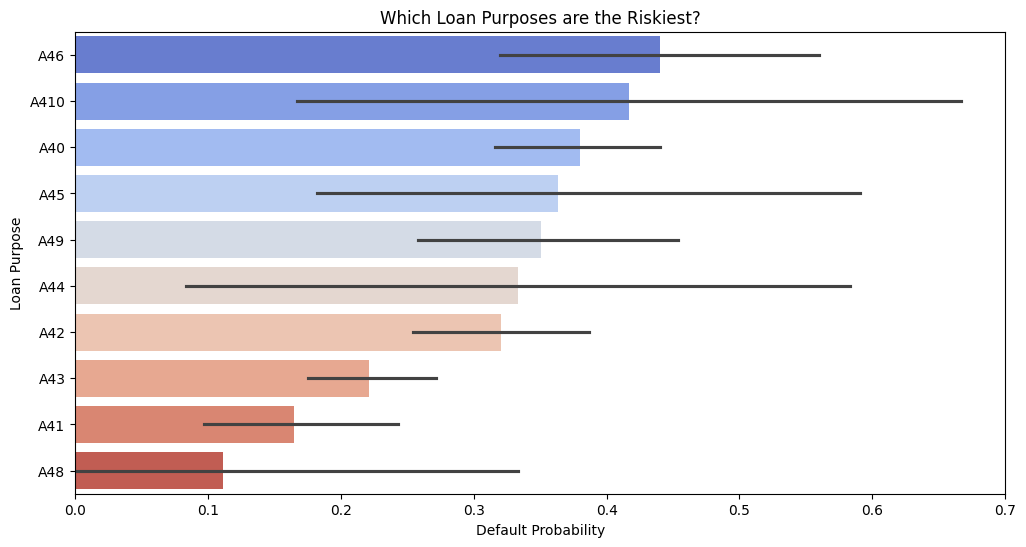

In [5]:
# --- ADD THIS TO NEW CELL ---

plt.figure(figsize=(12, 6))
# We sort the data so the riskiest loans are at the top
order = df.groupby('purpose')['default'].mean().sort_values(ascending=False).index

sns.barplot(x='default', y='purpose', data=df, order=order, palette="coolwarm", orient='h')
plt.title("Which Loan Purposes are the Riskiest?")
plt.xlabel("Default Probability")
plt.ylabel("Loan Purpose")
plt.show()

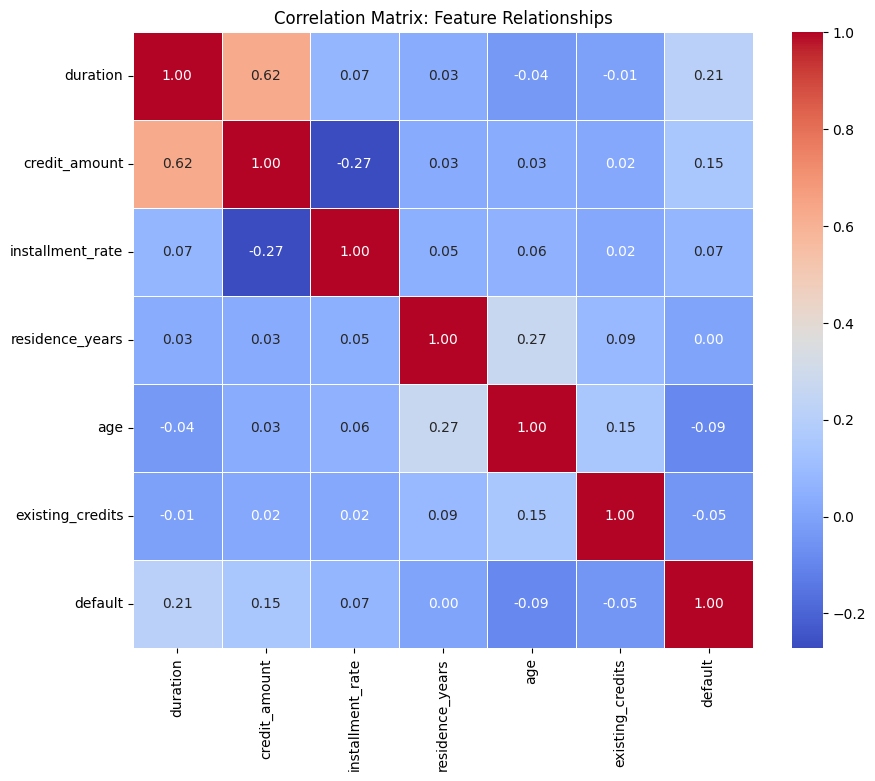

In [7]:
# --- FINAL CELL FOR GERMAN ANALYSIS ---
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Matrix
# We select only the numeric columns to see relationships
numeric_cols = ['duration', 'credit_amount', 'installment_rate', 'residence_years', 'age', 'existing_credits', 'default']
corr = df[numeric_cols].corr()

# 2. Heatmap Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Feature Relationships")
plt.show()